# A Lesson on Feature Engineering

Hello! Welcome to a guest lesson from Spencer. Spencer is a software engineer who works with data and machine learning models at [Picnic Health](https://picnichealth.com/).

Today's lesson will be on feature engineering. You'll spend the class diving into some example data, developing features and building a model. We'll also learn a bit about working with text.

You'll work individually but will check in with other periodically to compare ideas.

## Setup

You're already running this notebook in Colab so good job! Now run the below cells to import packages and load data.

## The Data

I've pulled data from the Airbnb monitoring project. [You can find the raw data here](http://insideairbnb.com/get-the-data.html) and [an interesting data visualization here](http://insideairbnb.com/new-york-city/).

## The Goal

The plan today is to build a classification model that predicts a listing's price.

## The Plan

- 30 minutes on data exploration
- 10 minutes of discussion
- 45 minutes on feature engineering
- 10 minutes of discussion
- 15 minutes on modeling
- 10 minutes of discussion
- 30 minutes to iterate on your work

Total: 2.5 hours

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
prices = pd.read_csv('https://raw.githubusercontent.com/sbarton272/usf_econ_622_feature_engineering/master/derived_data/prices.csv.zip',
                     index_col='id')

In [3]:
listings = pd.read_csv('https://raw.githubusercontent.com/sbarton272/usf_econ_622_feature_engineering/master/derived_data/listings.csv.zip',
                       index_col='id')

---

## Data Exploration

You're now going to take some time to explore the data.

### The Plan

- Spend 10 minutes starting to look at the data
- Spend 10 minutes to check-in with your classmates to hear about what they have discovered
- Spend 10 minutes looking at the data a bit more and thinking about issues you'll face

Remember you're trying to predict is a listing has a `high_price`.

Consider these questions
- Which columns do you think will best predict `high_price`?
- Are there columns with data that needs to be converted to a better format?
- How many listings are there per host?
- What should you do about null values?

### The Datatables

You have two csvs imported into pandas dataframes at this point.

**`price`**

This is a table indexed with listing `id` and containing two columns:

- `price` is the price per day of stay in USD of the list 
- `high_price` is true for listings where the price is above the median of $100

**`listings`**

This table contains a bunch of data. The `id` column can be used to join between this table and the `price` table.

This table has a bunch of interesting challenges. Some starter code is provided to get you going.

In [4]:
prices.shape

(50378, 2)

In [5]:
prices.head()

,price ($),high_price
id,,
2060,100.0,False
2595,225.0,True
3831,89.0,False
5099,200.0,True
5121,60.0,False


In [6]:
listings.shape

(50378, 80)

In [7]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50378 entries, 2060 to 43138585
Data columns (total 80 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          50361 non-null  object 
 1   summary                                       47877 non-null  object 
 2   description                                   49097 non-null  object 
 3   experiences_offered                           50378 non-null  object 
 4   host_id                                       50378 non-null  int64  
 5   host_name                                     50370 non-null  object 
 6   host_since                                    50370 non-null  object 
 7   host_location                                 50225 non-null  object 
 8   host_response_time                            29687 non-null  object 
 9   host_response_rate                            29687 non

In [8]:
listings.head()

,name,summary,description,experiences_offered,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
2060,Modern NYC,NaN,"Lovely, spacious, sunny 1 BR apartment in 6th ...",none,2259,Jenny,2008-08-18,US,a few days or more,22%,...,f,f,flexible,f,f,1,0,1,0,0.01
2595,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...","Beautiful, spacious skylit studio in the heart...",none,2845,Jennifer,2008-09-09,"New York, New York, United States",within a few hours,93%,...,f,f,strict_14_with_grace_period,t,t,2,2,0,0,0.38
3831,Cozy Entire Floor of Brownstone,Urban retreat: enjoy 500 s.f. floor in 1899 br...,Urban retreat: enjoy 500 s.f. floor in 1899 br...,none,4869,LisaRoxanne,2008-12-07,"New York, New York, United States",within an hour,89%,...,f,f,moderate,f,f,1,1,0,0,4.68
5099,Large Cozy 1 BR Apartment In Midtown East,My large 1 bedroom apartment has a true New Yo...,My large 1 bedroom apartment has a true New Yo...,none,7322,Chris,2009-02-02,"New York, New York, United States",NaN,NaN,...,f,f,moderate,t,t,1,1,0,0,0.58
5121,BlissArtsSpace!,NaN,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,none,7356,Garon,2009-02-03,"New York, New York, United States",NaN,NaN,...,f,f,strict_14_with_grace_period,f,f,1,0,1,0,0.38


It's your turn to explore the data! If you're stumped on what tools to use check out these pandas methods:

- [histogram code (hist)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html)
- [describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)
- [info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html)
- Some data is in strings. How do you deal with those? [Maybe try some string methods.](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#splitting-and-replacing-strings)

In [9]:
# Write some code and look at the data!

---

## Feature Engineering

You've taken a look at the data. Now we've got to focus on getting data ready for modeling.

### The Plan

- Spend 10 minutes thinking about some feature ideas
- Spend 10 minutes to check-in with your classmates to hear about what they have discovered
- Spend 25 minutes working on building a feature vector

Remember you're trying to predict is a listing has a `high_price`.

Consider these questions
- What should you do about null values?
- Which columns do you think will best predict `high_price`?
- How are you going to analyze your features?

In [10]:
# Here is some starter code to develop features

features = pd.DataFrame()

# Attach the target value for ease of analysis
features['target'] = prices['high_price'].astype(int)

# Here is an example feature
features['num_beds'] = listings['beds'].fillna(listings['beds'].median())

print(features.shape)
features.head()

(50378, 2)


,target,num_beds
id,,
2060,0,2.0
2595,1,1.0
3831,0,4.0
5099,1,1.0
5121,0,1.0


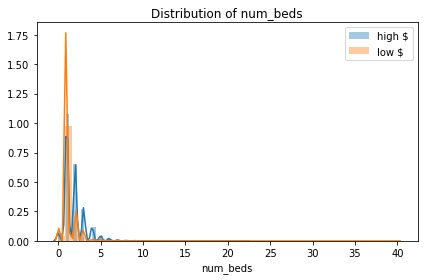

In [11]:
# Here is some code to help you analyze your features

def plot_feature_distributions(features, feature_col, target_col='target'):
    is_high_price = features[target_col] == 1
    
    fig, ax = plt.subplots()
    sns.distplot(features[is_high_price][feature_col], ax=ax, label='high $')
    sns.distplot(features[~is_high_price][feature_col], ax=ax, label='low $')
    ax.legend()
    ax.set_title(f'Distribution of {feature_col}')
    fig.tight_layout()
    
plot_feature_distributions(features, 'num_beds')

It is your turn to write some more features!

Take a look at some of these useful pandas methods
- [aggregation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html)
- [groupby for aggregation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)
- [string data extraction](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#extracting-substrings)
- [histogram code (hist)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html)
- [correlation calculation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)

In [41]:
# Write some more features!
listings.property_type.value_counts().index

cols = ['Apartment', 'House', 'Townhouse', 'Condominium', 'Loft',
       'Serviced apartment', 'Guest suite', 'Boutique hotel', 'Hotel']

df = pd.get_dummies(listings.property_type)[cols]
df['other'] = (df.sum(axis=1) == 0).astype(int)
df

,Apartment,House,Townhouse,Condominium,Loft,Serviced apartment,Guest suite,Boutique hotel,Hotel,other
id,,,,,,,,,,
2060,0,0,0,0,0,0,0,0,0,1
2595,1,0,0,0,0,0,0,0,0,0
3831,0,0,0,0,0,0,1,0,0,0
5099,1,0,0,0,0,0,0,0,0,0
5121,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
43134678,1,0,0,0,0,0,0,0,0,0
43135043,0,0,1,0,0,0,0,0,0,0
43135953,1,0,0,0,0,0,0,0,0,0


In [52]:
features['no-rating'] = listings.review_scores_rating.isnull().astype(int)
features

,target,num_beds,no-rating
id,,,
2060,0,2.0,0
2595,1,1.0,0
3831,0,4.0,0
5099,1,1.0,0
5121,0,1.0,0
...,...,...,...
43134678,1,2.0,1
43135043,0,1.0,1
43135953,0,1.0,1


In [55]:
neighborhood_cnts = listings.neighbourhood_cleansed.value_counts()
neighborhood_cnts

Williamsburg                  3827
Bedford-Stuyvesant            3797
Harlem                        2720
Bushwick                      2467
Hell's Kitchen                2135
                              ... 
Rossville                        1
Bay Terrace, Staten Island       1
Huguenot                         1
Fort Wadsworth                   1
Country Club                     1
Name: neighbourhood_cleansed, Length: 223, dtype: int64

In [63]:
top_20_neighborhoods = neighborhood_cnts.head(20).index.values
top_20_neighborhoods

array(['Williamsburg', 'Bedford-Stuyvesant', 'Harlem', 'Bushwick',
       "Hell's Kitchen", 'Upper West Side', 'East Village',
       'Upper East Side', 'Midtown', 'Crown Heights', 'Chelsea',
       'East Harlem', 'Greenpoint', 'Washington Heights',
       'Lower East Side', 'Astoria', 'Financial District', 'West Village',
       'Flatbush', 'Long Island City'], dtype=object)

In [68]:
cond = listings['neighbourhood_cleansed'].isin(top_20_neighborhoods)
listings[~cond]['neighbourhood_cleansed']
listings['n_grps'] = listings['neighbourhood_cleansed']
listings.

id
3831            Clinton Hill
5099             Murray Hill
5238               Chinatown
5803             South Slope
7097             Fort Greene
                  ...       
43132225    Theater District
43132542    Brooklyn Heights
43132544            Gramercy
43134172        Clinton Hill
43135043           Sunnyside
Name: neighbourhood_cleansed, Length: 17649, dtype: object

In [77]:
neighborhood_grp = pd.get_dummies(listings.neighbourhood_cleansed)[top_20_neighborhoods]
neighborhood_grp['other'] = 1 - neighborhood_grp.sum(axis=1)
neighborhood_grp.columns = ['neighborhood=' + col for col in neighborhood_grp.columns]
neighborhood_grp

,neighborhood=Williamsburg,neighborhood=Bedford-Stuyvesant,neighborhood=Harlem,neighborhood=Bushwick,neighborhood=Hell's Kitchen,neighborhood=Upper West Side,neighborhood=East Village,neighborhood=Upper East Side,neighborhood=Midtown,neighborhood=Crown Heights,...,neighborhood=East Harlem,neighborhood=Greenpoint,neighborhood=Washington Heights,neighborhood=Lower East Side,neighborhood=Astoria,neighborhood=Financial District,neighborhood=West Village,neighborhood=Flatbush,neighborhood=Long Island City,neighborhood=other
id,,,,,,,,,,,,,,,,,,,,,
2060,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2595,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5099,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5121,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43134678,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43135043,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
43135953,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [80]:
features = features.join(neighborhood_grp)
features

,target,num_beds,no-rating,neighborhood=Williamsburg,neighborhood=Bedford-Stuyvesant,neighborhood=Harlem,neighborhood=Bushwick,neighborhood=Hell's Kitchen,neighborhood=Upper West Side,neighborhood=East Village,...,neighborhood=East Harlem,neighborhood=Greenpoint,neighborhood=Washington Heights,neighborhood=Lower East Side,neighborhood=Astoria,neighborhood=Financial District,neighborhood=West Village,neighborhood=Flatbush,neighborhood=Long Island City,neighborhood=other
id,,,,,,,,,,,,,,,,,,,,,
2060,0,2.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2595,1,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3831,0,4.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5099,1,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5121,0,1.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43134678,1,2.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43135043,0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
43135953,0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


#### A Brief Aside on Text Features...

- Try out some regex! https://regex101.com/
- [Take a look at TFIDF](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)
  - Pay attention to stop words, 
  - [We can also use a different tokenizer...](https://scikit-learn.org/stable/modules/feature_extraction.html#customizing-the-vectorizer-classes)
    - Lematization helps to find the lemma (root) word we're dealing with. Ex studying --> study

In [18]:
import re
listings.description.str.match('upgrade', flags=re.IGNORECASE).fillna(False).mean()

5.95498034856485e-05

In [28]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/spencer/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
vectorizer = TfidfVectorizer(
    lowercase=True,
    max_df=0.95,
    min_df=0.01,
    stop_words=stopwords,
)


vectorizer.fit_transform(listings.description.fillna('').values)

<50378x1029 sparse matrix of type '<class 'numpy.float64'>'
	with 2628671 stored elements in Compressed Sparse Row format>

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords

class LemmaTokenizer:
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]

vectorizer = TfidfVectorizer(
    lowercase=True,
    max_df=0.95,
    min_df=0.01,
    stop_words=stopwords,
    tokenizer=LemmaTokenizer,
)

vectorizer.fit_transform(listings.description.values)

TypeError: 'WordListCorpusReader' object is not iterable

---

## Modeling and Model Evaluation

Now you've written some features. Most of the modeling code has been written but feel free to modify things!

### The Plan

- Spend 5 minutes to run the following code and see what happens
- Spend 10 minutes to check-in with your classmates to hear about what they have discovered

Consider these questions
- Is the model fitting well?
- Are there any other types of models you'd like to try?

In [81]:
# Split up the data for training
from sklearn.model_selection import train_test_split

y = features['target']
X = features.drop(columns=['target'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40302, 23), (10076, 23), (40302,), (10076,))

In [82]:
# Check that test and train have a similar proportion of classes
y_train.mean(), y_test.mean()

(0.4983871768150464, 0.49880905121079794)

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import numpy as np

# Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
parameters = {
    'n_estimators': np.arange(30, 500, 3),
    'criterion': ['gini'],
    'max_depth': [None] + np.arange(1, 30).tolist(), # None is unlimited depth
    'min_samples_split': np.linspace(0.0001, 0.01),  # Fraction of training samples necessary to continue split
    'max_samples': np.linspace(0.5, 1.0, 20, endpoint=False),  # % of samples to select for each tree
}

# Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
searcher = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=parameters,
    n_iter=15,
    cv=5,  # number of cross validation folds
    random_state=42,
    n_jobs=-1,
    verbose=1,
)
search = searcher.fit(X_train, y_train)
search.best_params_

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  3.3min finished


{'n_estimators': 177,
 'min_samples_split': 0.0017163265306122451,
 'max_samples': 0.825,
 'max_depth': None,
 'criterion': 'gini'}

In [84]:
rf_clf = search.best_estimator_
rf_clf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=0.825,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1,
                       min_samples_split=0.0017163265306122451,
                       min_weight_fraction_leaf=0.0, n_estimators=177,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Model Evaluation

A bunch of useful methods are provided below. Just run the code!

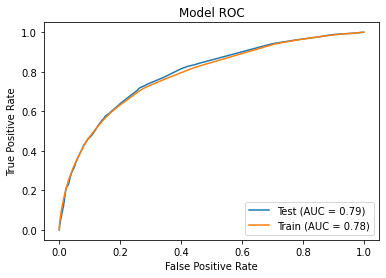

In [85]:
from sklearn.metrics import plot_roc_curve

fig, ax = plt.subplots()

plot_roc_curve(rf_clf, X_test, y_test, name='Test', ax=ax)
plot_roc_curve(rf_clf, X_train, y_train, name='Train', ax=ax)

ax.set_title('Model ROC');

In [ ]:
from sklearn.met

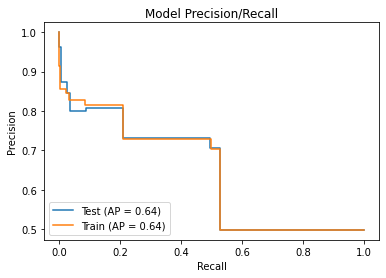

In [32]:
from sklearn.metrics import plot_precision_recall_curve

fig, ax = plt.subplots()

plot_precision_recall_curve(rf_clf, X_test, y_test, name='Test', ax=ax)
plot_precision_recall_curve(rf_clf, X_train, y_train, name='Train', ax=ax)

ax.set_title('Model Precision/Recall');

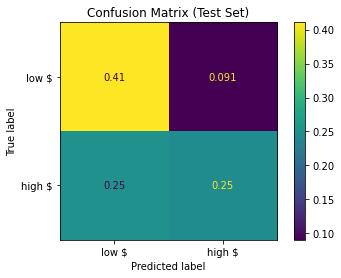

In [35]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots()

ax.grid(False)

plot_confusion_matrix(rf_clf, X_test, y_test, ax=ax, normalize='all', display_labels=['low $', 'high $'])

ax.set_title('Confusion Matrix (Test Set)');

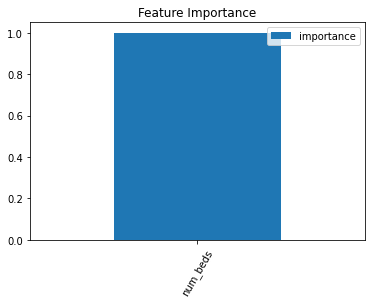

In [36]:
features_importance = pd.DataFrame(index=X.columns)
features_importance['importance'] = rf_clf.feature_importances_
features_importance.sort_values('importance', ascending=False, inplace=True)

ax = features_importance.plot.bar(rot=60)
ax.set_title('Feature Importance');